In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [3]:
%matplotlib inline
sns.set()

In [14]:
movies_df = pd.read_csv('movies_data_20191030_v2.csv')

In [15]:
movies_df.head()

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,num_sp_languages,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4)
0,19995.0,Avatar,Avatar,Enter the World of Pandora.,87096.0,237000000.0,760507625,0.0,0.0,0.0,...,2,0.76235,9.2542,-2.536757,137094001,1.798308e+08,1,1,1,1
1,8373.0,Transformers: Revenge of the Fallen,Transformers: Revenge of the Fallen,Revenge is coming.,8650.0,150000000.0,402111870,0.0,0.0,0.0,...,2,0.76235,9.2542,-2.536757,91110948,1.195133e+08,1,1,1,1
2,767.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince,Dark Secrets Revealed,1241.0,250000000.0,302089278,0.0,0.0,0.0,...,1,0.76235,9.2542,-2.536757,80186627,1.051835e+08,1,1,1,1
3,18239.0,The Twilight Saga: New Moon,The Twilight Saga: New Moon,The Next Chapter Begins.,33514.0,50000000.0,296623634,0.0,0.0,0.0,...,2,0.76235,9.2542,-2.536757,188077665,2.467078e+08,1,1,1,1
4,14160.0,Up,Up,NaN,NaN,175000000.0,293004164,0.0,0.0,0.0,...,1,0.76235,9.2542,-2.536757,93072435,1.220862e+08,1,1,1,1


## Preprocessing 

#### "Total_gross" 4分位差

In [16]:
movies_df['Total_gross'].describe()/10000

count        0.629600
mean      1813.126786
std       5579.985394
min          0.007200
25%          2.972250
50%         21.068850
75%        530.860850
max      93666.222500
Name: Total_gross, dtype: float64

In [17]:
movies_df['First_week_gross'].describe()/10000

count        0.629600
mean       684.454441
std       2364.175545
min          0.001100
25%          0.832375
50%          4.426550
75%         85.261600
max      47389.463800
Name: First_week_gross, dtype: float64

In [18]:
movies_df['adj_first_week_gross'].describe()/10000

count        0.629600
mean       472.716142
std       1691.929375
min          0.000527
25%          0.526136
50%          2.799249
75%         55.939390
max      36551.092040
Name: adj_first_week_gross, dtype: float64

### 用首週票房金額分四類

In [19]:
def get_gross_level4(value):
    if value >= 40000000:
        return 1
    elif value >= 10000000 and value < 40000000:
        return 2
    elif value >= 1000000 and value < 10000000:
        return 3
    else:
        return 4

In [21]:
movies_df.head()

,tmdb_id,mojo_title,original_title,tagline,collection_id,budget,Total_gross,comments_total_qty,sc_negative,sc_neutral,...,num_sp_languages,gdp_deflator,unemployment_rate,gdp_annual_rate,First_week_gross,adj_first_week_gross,boxoffice_level,week_boxoffice_level,boxoffice_level(4),week_boxoffice_level(4)
0,19995.0,Avatar,Avatar,Enter the World of Pandora.,87096.0,237000000.0,760507625,0.0,0.0,0.0,...,2,0.76235,9.2542,-2.536757,137094001,1.798308e+08,1,1,1,1
1,8373.0,Transformers: Revenge of the Fallen,Transformers: Revenge of the Fallen,Revenge is coming.,8650.0,150000000.0,402111870,0.0,0.0,0.0,...,2,0.76235,9.2542,-2.536757,91110948,1.195133e+08,1,1,1,1
2,767.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince,Dark Secrets Revealed,1241.0,250000000.0,302089278,0.0,0.0,0.0,...,1,0.76235,9.2542,-2.536757,80186627,1.051835e+08,1,1,1,1
3,18239.0,The Twilight Saga: New Moon,The Twilight Saga: New Moon,The Next Chapter Begins.,33514.0,50000000.0,296623634,0.0,0.0,0.0,...,2,0.76235,9.2542,-2.536757,188077665,2.467078e+08,1,1,1,1
4,14160.0,Up,Up,NaN,NaN,175000000.0,293004164,0.0,0.0,0.0,...,1,0.76235,9.2542,-2.536757,93072435,1.220862e+08,1,1,1,1


In [22]:
movies_df['week_boxoffice_level(4)'] = movies_df['First_week_gross'].apply(lambda x: get_gross_level4(x))

In [23]:
for i in set(movies_df['week_boxoffice_level(4)']):
    print(movies_df[movies_df['week_boxoffice_level(4)'] == i]['tmdb_id'].count())

292
674
567
4763


In [25]:
movies_df.to_csv('movies_data_20191030_v3.csv', encoding='utf-8', index=False)

In [26]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6296 entries, 0 to 6295
Data columns (total 74 columns):
tmdb_id                           6296 non-null float64
mojo_title                        6296 non-null object
original_title                    6296 non-null object
tagline                           3619 non-null object
collection_id                     668 non-null float64
budget                            2401 non-null float64
Total_gross                       6296 non-null int64
comments_total_qty                6296 non-null float64
sc_negative                       6296 non-null float64
sc_neutral                        6296 non-null float64
sc_positive                       6296 non-null float64
total_sentiment_level             6296 non-null object
holidayweek                       1019 non-null object
Release_date                      6296 non-null object
Release_year                      6296 non-null int64
Release_month                     6296 non-null int64
Release_we

###  類別標籤編碼

In [14]:
from sklearn.preprocessing import LabelEncoder

original_language

In [15]:
le_lang = LabelEncoder()
label_language = le_lang.fit_transform(movies_df['original_language'].values)
label_language

array([14, 14, 14, ..., 12, 14, 19])

In [16]:
le_lang.inverse_transform(label_language)

array(['en', 'en', 'en', ..., 'de', 'en', 'fr'], dtype=object)

In [17]:
movies_df['original_language'] = label_language

distributor

In [18]:
le_dis = LabelEncoder()
label_distributor = le_dis.fit_transform(movies_df['distributor'].values)
label_distributor

array([192, 364, 511, ..., 170, 116, 505])

In [19]:
le_dis.inverse_transform(label_distributor)

array(['Fox', 'Paramount', 'Warner Bros.', ..., 'Film Movement',
       'Cinema Libre Studio', 'Viva Pictures Distribution'], dtype=object)

In [20]:
movies_df['distributor'] = label_distributor

genres

In [21]:
le_gen = LabelEncoder()
label_genres = le_gen.fit_transform(movies_df['genres'].values)
label_genres

array([ 56, 159,   7, ..., 130, 638, 311])

In [22]:
le_gen.inverse_transform(label_genres)

array(['[12, 14, 28, 878]', '[12, 28, 878]', '[12, 14, 10751]', ...,
       '[12, 18]', '[99]', '[16, 35]'], dtype=object)

In [23]:
movies_df['genres'] = label_genres

top3_cast

In [24]:
le_cast_pkg = LabelEncoder()
label_top3_cast = le_cast_pkg.fit_transform(movies_df['top3_cast'].values)
label_top3_cast

array([4763,  332,  342, ..., 2081, 5902,  632])

In [25]:
le_cast_pkg.inverse_transform(label_top3_cast)

array(['[65731, 8691, 32747]', '[10959, 19537, 19536]',
       '[10980, 10989, 10990]', ..., '[17373, 49204, 1846]', 'unknown',
       '[1165008, 118178, 37181]'], dtype=object)

In [26]:
movies_df['top3_cast'] = label_top3_cast

cast

In [27]:
le_cast = LabelEncoder()
label_1st_cast = le_cast.fit_transform(movies_df['1st_cast'].values)
label_1st_cast

array([3003,  250,  254, ..., 1530, 3671,  442])

In [28]:
label_2nd_cast = le_cast.fit_transform(movies_df['2nd_cast'].values)
label_2nd_cast

array([3769, 1872,  252, ..., 2785, 4066,  532])

In [29]:
label_3rd_cast = le_cast.fit_transform(movies_df['3rd_cast'].values)
label_3rd_cast

array([2676, 2001,  270, ..., 1881, 4316, 2771])

In [30]:
movies_df['1st_cast'] = label_1st_cast
movies_df['2nd_cast'] = label_2nd_cast
movies_df['3rd_cast'] = label_3rd_cast

director

In [31]:
le_drt = LabelEncoder()
label_director = le_drt.fit_transform(movies_df['director_id'].values)
label_director

array([2762, 4023,  545, ..., 3085, 3702, 2108])

In [32]:
movies_df['director_id'] = label_director

sentiment_level

In [33]:
le_sen = LabelEncoder()
label_bf_release = le_sen.fit_transform(movies_df['sentiment_level_before_release'].values)
label_bf_release

array([3, 3, 3, ..., 0, 3, 3])

In [34]:
movies_df['sentiment_level_before_release'] = label_bf_release

In [35]:
le_sen.inverse_transform(label_bf_release)

array(['unknown', 'unknown', 'unknown', ..., 'negative', 'unknown',
       'unknown'], dtype=object)

### Change datatype

In [36]:
movies_df['Release_date'] = movies_df['Release_date'].astype('datetime64')

In [37]:
movies_df['release_in_holidayweek'] = movies_df['release_in_holidayweek'].astype('int32')
movies_df['homepage'] = movies_df['homepage'].astype('int32')
movies_df['have_comments'] = movies_df['have_comments'].astype('int32')

In [38]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6296 entries, 0 to 6295
Data columns (total 74 columns):
tmdb_id                           6296 non-null float64
mojo_title                        6296 non-null object
original_title                    6296 non-null object
tagline                           3619 non-null object
collection_id                     668 non-null float64
budget                            2401 non-null float64
Total_gross                       6296 non-null int64
comments_total_qty                6296 non-null float64
sc_negative                       6296 non-null float64
sc_neutral                        6296 non-null float64
sc_positive                       6296 non-null float64
total_sentiment_level             6296 non-null object
holidayweek                       1019 non-null object
Release_date                      6296 non-null datetime64[ns]
Release_year                      6296 non-null int64
Release_month                     6296 non-null int64
Re

## Tree models

### drop模型不會使用的欄位

In [39]:
movies_df = movies_df.iloc[:,13:]

In [40]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6296 entries, 0 to 6295
Data columns (total 61 columns):
Release_date                      6296 non-null datetime64[ns]
Release_year                      6296 non-null int64
Release_month                     6296 non-null int64
Release_weekday                   6296 non-null int64
release_in_holidayweek            6296 non-null int32
original_language                 6296 non-null int32
distributor                       6296 non-null int32
belongs_to_collection             6296 non-null int64
homepage                          6296 non-null int32
genres                            6296 non-null int32
Adventure                         6296 non-null int64
Fantasy                           6296 non-null int64
Animation                         6296 non-null int64
Drama                             6296 non-null int64
Horror                            6296 non-null int64
Action                            6296 non-null int64
Comedy              

### 測試分類不同的預測結果：boxoffice_level, week_boxoffice_level, boxoffice_level(4)

#### 特徵全丟

預測total_gross的類別：
* best f1_score: 0.50
* each categories: 0.66, 0.70, 0.39, 0.48, 0.22, 0.55
* param setting: {'booster': 'gbtree',
 'silent': 1,
 'eta': 0.1,
 'gamma': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'max_delta_step': 0,
 'subsample': 1,
 'lambda': 2.5,
 'alpha': 5,
 'tree_method': 'auto',
 'objective': 'multi:softmax',
 'num_class': 6}

預測First_week_gross的類別：
* best f1_score: 0.54
* each categories: 0.80, 0.34, 0.49, 0.06, 0.42, 0.64
* param setting: {'booster': 'gbtree',
 'silent': 1,
 'eta': 0.1,
 'gamma': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'max_delta_step': 0,
 'subsample': 1,
 'lambda': 0,
 'alpha': 1,
 'tree_method': 'auto',
 'objective': 'multi:softmax',
 'num_class': 6}

預測total_gross(4)的類別：
* best f1_score: 0.81
* each categories: 0.66, 0.70, 0.39, 0.92
* param setting: {'booster': 'gbtree',
 'silent': 1,
 'eta': 0.1,
 'gamma': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'max_delta_step': 0,
 'subsample': 1,
 'lambda': 2,
 'alpha': 0,
 'tree_method': 'auto',
 'objective': 'multi:softmax',
 'num_class': 6}

In [41]:
X = movies_df.iloc[:,1:-6]

In [42]:
X.head()

,Release_year,Release_month,Release_weekday,release_in_holidayweek,original_language,distributor,belongs_to_collection,homepage,genres,Adventure,...,sc2_negative_pc,sc2_neutral_pc,sc2_positive_pc,comments_bf_1wk,comments_bf_2wk,comments_bf_4wk,num_sp_languages,gdp_deflator,unemployment_rate,gdp_annual_rate
0,2009,12,4,0,14,192,1,1,56,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0.76235,9.2542,-2.536757
1,2009,6,2,0,14,364,1,0,159,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0.76235,9.2542,-2.536757
2,2009,7,2,0,14,511,1,1,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.76235,9.2542,-2.536757
3,2009,11,4,0,14,456,1,0,30,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0.76235,9.2542,-2.536757
4,2009,5,4,1,14,90,0,1,84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.76235,9.2542,-2.536757


In [43]:
y = movies_df['boxoffice_level(4)'].values

In [46]:
y = movies_df['week_boxoffice_level(4)'].values

In [47]:
y

array([1, 1, 1, ..., 4, 4, 4], dtype=int64)

In [48]:
set(y)

{1, 2, 3, 4}

#### 去掉dummy variances

預測total_gross的類別：
* best f1_score: 0.48
* each categories: 0.71, 0.69. 0.29, 0.45, 0.25, 0.52
* param setting:{'booster': 'gbtree',
 'silent': 1,
 'eta': 0.1,
 'gamma': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'max_delta_step': 0,
 'subsample': 1,
 'lambda': 2,
 'alpha': 10,
 'tree_method': 'auto',
 'objective': 'multi:softmax',
 'num_class': 6}

預測First_week_gross的類別：
* best f1_score: 0.52
* each categories:0.77, 0.37, 0.46, 0.04, 0.46, 0.64
* param setting:{'booster': 'gbtree',
 'silent': 1,
 'eta': 0.1,
 'gamma': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'max_delta_step': 0,
 'subsample': 1,
 'lambda': 10,
 'alpha': 0,
 'tree_method': 'auto',
 'objective': 'multi:softmax',
 'num_class': 6}

預測total_gross(4)的類別：
* best f1_score: 0.82
* each categories: 0.73, 0.72, 0.41, 0.93
* param setting:{'booster': 'gbtree',
 'silent': 1,
 'eta': 0.1,
 'gamma': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'max_delta_step': 0,
 'subsample': 1,
 'lambda': 2.5,
 'alpha': 0,
 'tree_method': 'auto',
 'objective': 'multi:softmax',
 'num_class': 6}

In [ ]:
X = movies_df.iloc[:,1:-5]

In [ ]:
X.drop(columns=['Adventure','Fantasy','Animation','Drama','Horror','Action','Comedy','History',
                'Thriller','Crime','Documentary','Science Fiction','Mystery','Romance','Family','genre_others'],
       inplace=True)

In [ ]:
X.head()

In [ ]:
y = movies_df['boxoffice_level(4)'].values
set(y)

#### 分測試與訓練集

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [54]:
X_train.shape, y_train.shape

((5036, 54), (5036,))

In [55]:
X_test.shape, y_test.shape

((1260, 54), (1260,))

In [56]:
y_train, y_test

(array([4, 4, 3, ..., 4, 4, 4], dtype=int64),
 array([4, 4, 1, ..., 4, 4, 4], dtype=int64))

### Random Forest

In [57]:
from sklearn import tree
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [58]:
clf = RandomForestClassifier(n_estimators='warn',
                             criterion='gini',
                             max_depth=None,
                             max_features='auto',
                             max_leaf_nodes=None,
                             min_impurity_split=None,
                             bootstrap=True,
                             oob_score=True,
                             verbose=0,
                             warm_start=False,
                             class_weight=None)
model = clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [59]:
testPredY = model.predict(X_test)
print(classification_report(y_test, testPredY))

              precision    recall  f1-score   support

           1       0.65      0.55      0.60        58
           2       0.51      0.49      0.50       135
           3       0.15      0.04      0.07       114
           4       0.87      0.96      0.92       953

    accuracy                           0.81      1260
   macro avg       0.55      0.51      0.52      1260
weighted avg       0.76      0.81      0.78      1260



In [60]:
f1_score(y_test, testPredY, average='micro')

0.8087301587301587

In [61]:
model.oob_score_

0.7571485305798252

In [62]:
results = {}
for col_name, importance in zip(list(X_train.columns), model.feature_importances_):
    results[col_name] = importance
results = pd.Series(results).sort_values(ascending=False)
results.head(10)

comments_bf_2wk                0.069078
num_cast                       0.065748
distributor                    0.050726
sc2_positive                   0.048212
comments_bf_1wk                0.043465
comments_qty_before_release    0.041702
comments_bf_4wk                0.040651
genres                         0.031981
belongs_to_collection          0.031636
3rd_cast                       0.029906
dtype: float64

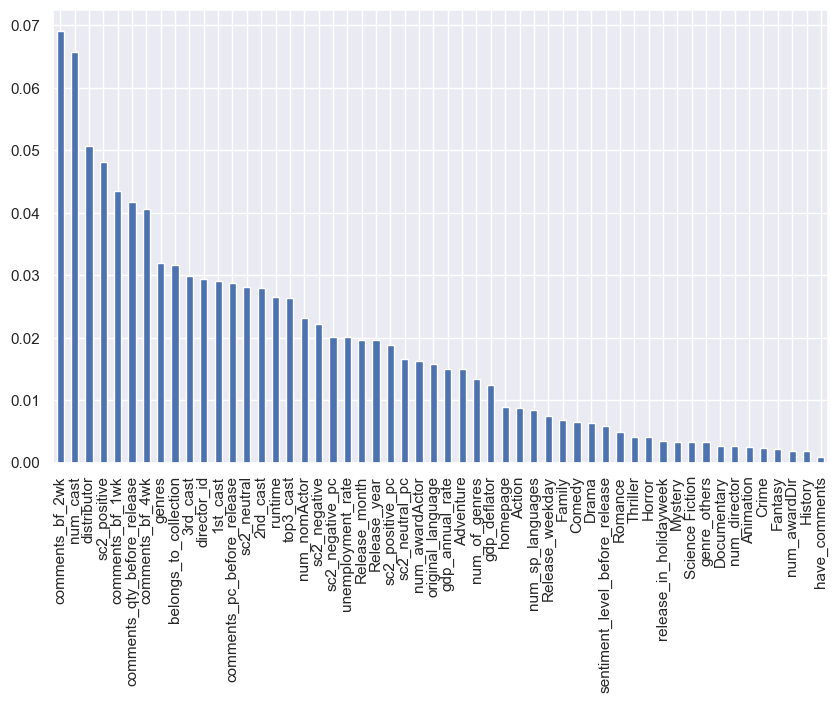

In [63]:
plt.figure(figsize=(10,6),dpi=100)
results.plot(kind='bar')

### Xgboost

In [64]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [65]:
X_train.shape, y_train.shape

((5036, 54), (5036,))

In [66]:
y_train -= 1
y_test -= 1

In [67]:
y_train, y_test.shape

(array([3, 3, 2, ..., 3, 3, 3], dtype=int64), (1260,))

In [68]:
set(y_train), set(y_test)

({0, 1, 2, 3}, {0, 1, 2, 3})

### Parameter testing

In [ ]:
data_train = xgb.DMatrix(X_train, label=y_train)
data_test = xgb.DMatrix(X_test, label=y_test)

In [ ]:
param_list = []
l1 = l2 = [0,1,1.5,2,2.5,3,5,8,10]

for i in l1:
    for j in l2:
        param = {}
        param['booster'] = 'gbtree'
        param['silent'] = 1
        param['eta'] = 0.1
        param['gamma'] = 0
        param['max_depth'] = 6
        param['min_child_weight'] = 1
        param['max_delta_step'] = 0
        param['subsample'] = 1 
        param['lambda'] = j
        param['alpha'] = i
        param['tree_method'] = 'auto'
        # param['scale_pos_weight'] = 
        param['objective'] = 'multi:softmax'
        param['num_class'] = 6
        param_list.append(param)

eval_list = [(data_train,'train'), (data_test,'test')]
num_round = 1000
eval_history = {}

In [ ]:
len(param_list)

In [ ]:
f1_score_res, cls_report_res = [], []

for p in param_list:
    model = xgb.train(p, data_train, num_round, eval_list, evals_result=eval_history, verbose_eval=False)
    y_pred = model.predict(data_test)
    f1_score_res.append(f1_score(y_test, y_pred.astype('int'), average='micro'))
    cls_report_res.append(classification_report(y_test, y_pred.astype('int')))

In [ ]:
np.array(f1_score_res).max()

In [ ]:
param_list[np.array(f1_score_res).argmax()]

In [ ]:
print(cls_report_res[np.array(f1_score_res).argmax()])

### K-fold

In [ ]:
def build_xgb_model(trn_x, trn_y, tst_x, tst_y):
    data_train = xgb.DMatrix(trn_x, label=trn_y)
    data_test = xgb.DMatrix(tst_x, label=tst_y)
    param = {}
    param['booster'] = 'gbtree'
    param['silent'] = 1
    param['eta'] = 0.1
    param['gamma'] = 0
    param['max_depth'] = 6
    param['min_child_weight'] = 1
    param['max_delta_step'] = 0
    param['subsample'] = 1 
    param['lambda'] = 2.5
    param['alpha'] = 0
    param['tree_method'] = 'auto'
    param['objective'] = 'multi:softmax'
    param['num_class'] = 6
    eval_list = [(data_train,'train'), (data_test,'test')]
    num_round = 2000
    eval_history = {}
    
    model = xgb.train(param, data_train, num_round, eval_list, evals_result=eval_history, verbose_eval=False)
    
    return model

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
random_seed = 2019
fold = list(KFold(n_splits=5, shuffle=True, random_state=random_seed).split(X_train))
results = []

In [ ]:
X_train.shape, X_test.shape

In [ ]:
data_test = xgb.DMatrix(X_test)

In [ ]:
for i, (trn, val) in enumerate(fold):
    trn_x = X_train.loc[trn, :]
    trn_y = y_train[trn]
    tst_x = X_train.loc[val, :]
    tst_y = y_train[val]
    model = build_xgb_model(trn_x, trn_y, tst_x, tst_y)
    pred_y = model.predict(data_test)
    f1_score_micro = f1_score(y_test, pred_y.astype('int'), average='micro')
    clf_report = classification_report(y_test, pred_y.astype('int'))
    results.append({'f1_score':f1_score_micro, 'classification_report':clf_report})
    print(f'fold{i}:')
    print('F1 Score:' + str(f1_score_micro))
    print(clf_report)

### final testing

0.8125
* 'eta': 0.1,
* 'subsample':0.5,
* 'lambda': 1.5,
* 'alpha': 1.5,


In [69]:
data_train = xgb.DMatrix(X_train, label=y_train)
data_test = xgb.DMatrix(X_test, label=y_test)

In [70]:
param = {}
param['booster'] = 'gbtree'
param['silent'] = 1
param['eta'] = 0.1
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight'] = 1
param['max_delta_step'] = 0
param['subsample'] = 1
param['lambda'] = 1.5
param['alpha'] = 1.5
param['tree_method'] = 'auto'
# param['scale_pos_weight'] = 
param['objective'] = 'multi:softmax'
param['num_class'] = 6

eval_list = [(data_train,'train'), (data_test,'test')]
num_round = 1000
eval_history = {}

In [71]:
model = xgb.train(param, data_train, num_round, eval_list, evals_result=eval_history, verbose_eval=False)

In [72]:
rmse_train = eval_history['train']['merror']
rmse_test = eval_history['test']['merror']

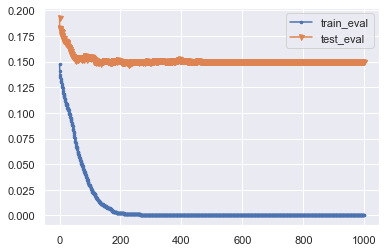

In [73]:
plt.plot(rmse_train, ms=5, marker='.', label='train_eval')
plt.plot(rmse_test, ms=5, marker='v', label='test_eval')
plt.legend()
plt.show()

In [74]:
model.eval(data_train), model.eval(data_test)

('[0]\teval-merror:0.000000', '[0]\teval-merror:0.149206')

In [75]:
y_pred = model.predict(data_test)

In [76]:
f1_score(y_test, y_pred.astype('int'), average='micro')

0.8507936507936508

In [77]:
print(classification_report(y_test, y_pred.astype('int')))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        58
           1       0.58      0.64      0.61       135
           2       0.41      0.16      0.23       114
           3       0.92      0.98      0.95       953

    accuracy                           0.85      1260
   macro avg       0.65      0.60      0.61      1260
weighted avg       0.83      0.85      0.83      1260



In [78]:
%matplotlib inline
sns.set()

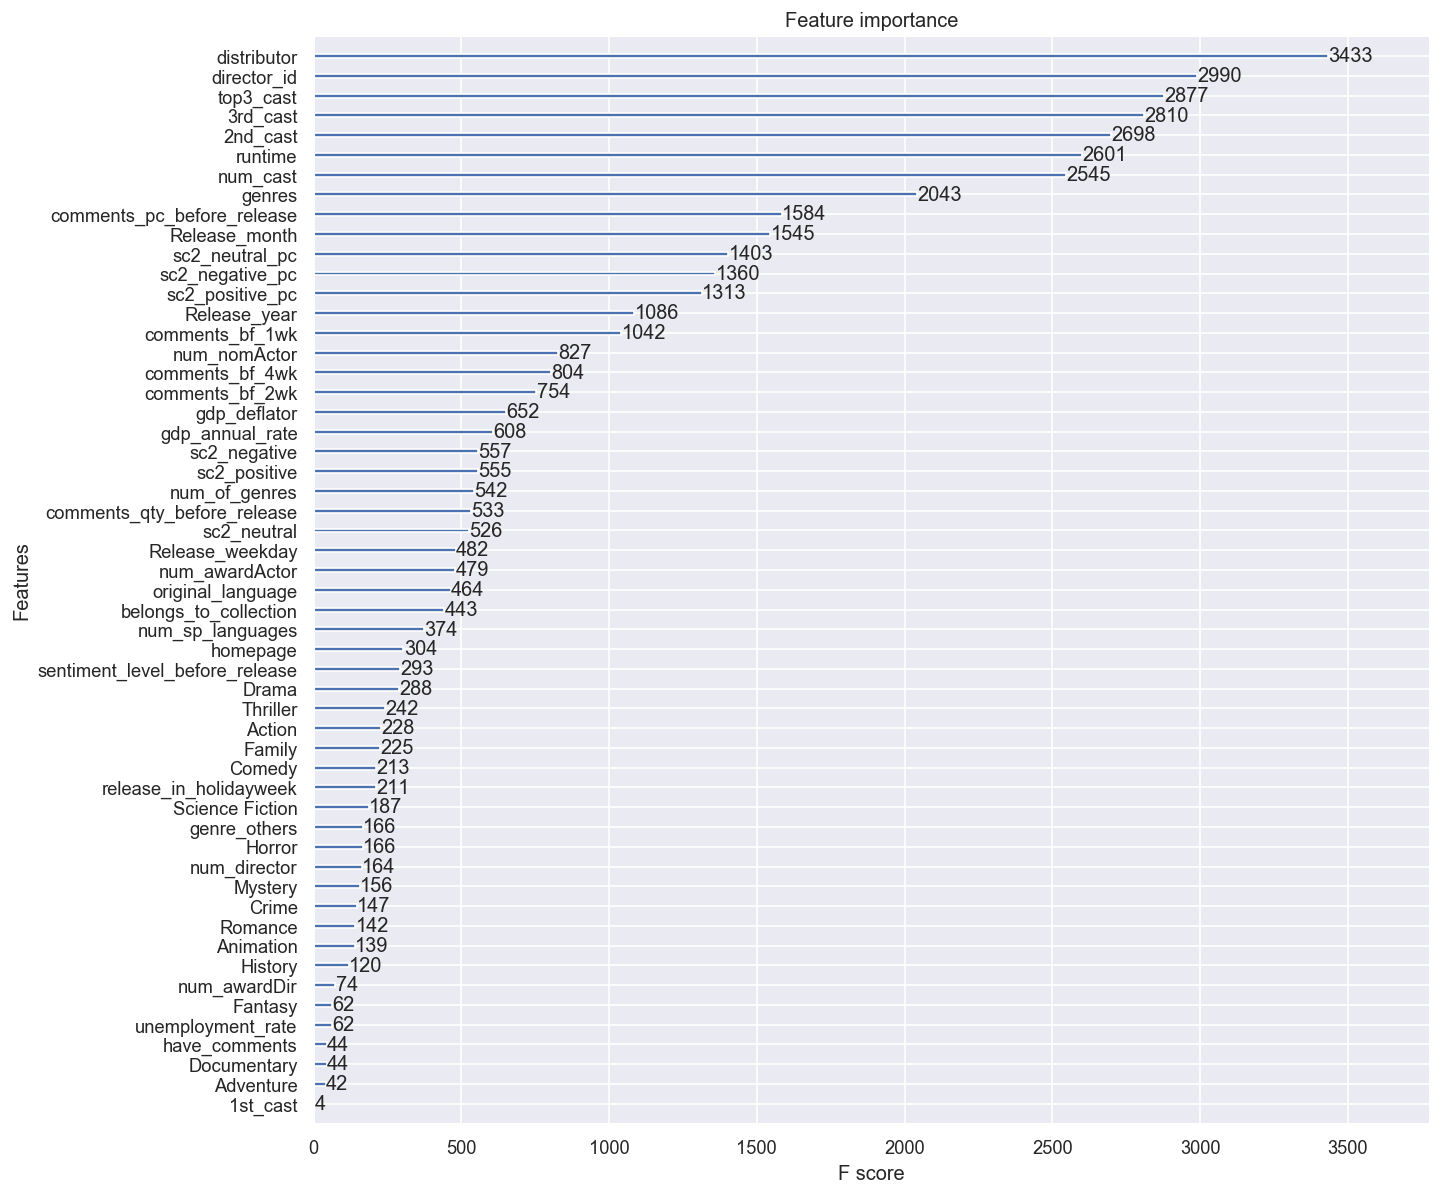

In [79]:
fig, ax = plt.subplots(figsize=(12,12), dpi=120)
plot_importance(model, ax=ax)

In [80]:
model.get_score()

{'sc2_positive': 555,
 'belongs_to_collection': 443,
 'num_cast': 2545,
 'comments_bf_1wk': 1042,
 'distributor': 3433,
 'runtime': 2601,
 'Science Fiction': 187,
 'Animation': 139,
 '2nd_cast': 2698,
 'gdp_deflator': 652,
 'sc2_negative': 557,
 'num_nomActor': 827,
 'genres': 2043,
 'top3_cast': 2877,
 'release_in_holidayweek': 211,
 'Drama': 288,
 'Release_weekday': 482,
 'Release_year': 1086,
 'homepage': 304,
 'comments_bf_2wk': 754,
 'director_id': 2990,
 'original_language': 464,
 'comments_pc_before_release': 1584,
 '3rd_cast': 2810,
 'comments_qty_before_release': 533,
 'Horror': 166,
 'comments_bf_4wk': 804,
 'sc2_neutral': 526,
 'sc2_negative_pc': 1360,
 'num_awardActor': 479,
 'gdp_annual_rate': 608,
 'Action': 228,
 'sc2_neutral_pc': 1403,
 'Release_month': 1545,
 'Comedy': 213,
 'sc2_positive_pc': 1313,
 'num_of_genres': 542,
 'Family': 225,
 'Mystery': 156,
 'Crime': 147,
 'num_sp_languages': 374,
 'Documentary': 44,
 'sentiment_level_before_release': 293,
 'num_awardDir'